# IDS 575 -- Anomaly Detection in time series data by Group 10

### Necessary Imports

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading and understanding the Data

In [98]:
#Importing our downloaded dataset as a pandas dataframe
df=pd.read_csv("sensor.csv", index_col=0, encoding='latin-1')

In [99]:
df.shape

(220320, 54)

In [100]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [101]:
df.tail()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [103]:
df.nunique()

timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_15              0
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898
sensor_38            602


In [104]:
df['machine_status'].value_counts(dropna=False).head()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [105]:
# Let's count the unique values of one of the columns
df['sensor_15'].value_counts(dropna=False).head()

NaN    220320
Name: sensor_15, dtype: int64

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


## Data Cleaning and Preprocessing

In [107]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(220320, 54)

In [108]:
# Entire "sensor_15" column is NaN therefore removing the entire column from the data set
del df['sensor_15']

In [109]:
# Function that calculates the percentage of missing values
def null_values(df):
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            print("Column ",[i]," ",(df[i].isnull().sum()*100)/df.shape[0])

In [110]:
null_values(df)

Column  ['sensor_00']   4.633260711692084
Column  ['sensor_01']   0.16748366013071894
Column  ['sensor_02']   0.008623819898329702
Column  ['sensor_03']   0.008623819898329702
Column  ['sensor_04']   0.008623819898329702
Column  ['sensor_05']   0.008623819898329702
Column  ['sensor_06']   2.177741466957153
Column  ['sensor_07']   2.474128540305011
Column  ['sensor_08']   2.3179920116194626
Column  ['sensor_09']   2.0856027596223674
Column  ['sensor_10']   0.008623819898329702
Column  ['sensor_11']   0.008623819898329702
Column  ['sensor_12']   0.008623819898329702
Column  ['sensor_13']   0.008623819898329702
Column  ['sensor_14']   0.009531590413943355
Column  ['sensor_16']   0.01407044299201162
Column  ['sensor_17']   0.020878721859114015
Column  ['sensor_18']   0.020878721859114015
Column  ['sensor_19']   0.007262164124909223
Column  ['sensor_20']   0.007262164124909223
Column  ['sensor_21']   0.007262164124909223
Column  ['sensor_22']   0.018609295570079884
Column  ['sensor_23']   0

We can see that the data needs some cleaning as there are missing values in multiple columns, one of the sensor readings are empty and the timestamp column has incorrect datatype

1.   Remove redundant columns
2.   Remove duplicates
3.   Handle missing values
4.   Convert data types to the correct data type

In [111]:
df[['sensor_50', 'sensor_51', 'sensor_00', 'sensor_07', 'sensor_08', 'sensor_06', 'sensor_09']].describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_50,143303.0,183.049260,65.258650,27.488426,167.534700,193.865700,219.907400,1000.000000
sensor_51,204937.0,202.699667,109.588607,27.777779,179.108800,197.338000,216.724500,1000.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


In [112]:
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [113]:
null_values(df)

Column  ['sensor_01']   0.16748366013071894
Column  ['sensor_02']   0.008623819898329702
Column  ['sensor_03']   0.008623819898329702
Column  ['sensor_04']   0.008623819898329702
Column  ['sensor_05']   0.008623819898329702
Column  ['sensor_10']   0.008623819898329702
Column  ['sensor_11']   0.008623819898329702
Column  ['sensor_12']   0.008623819898329702
Column  ['sensor_13']   0.008623819898329702
Column  ['sensor_14']   0.009531590413943355
Column  ['sensor_16']   0.01407044299201162
Column  ['sensor_17']   0.020878721859114015
Column  ['sensor_18']   0.020878721859114015
Column  ['sensor_19']   0.007262164124909223
Column  ['sensor_20']   0.007262164124909223
Column  ['sensor_21']   0.007262164124909223
Column  ['sensor_22']   0.018609295570079884
Column  ['sensor_23']   0.007262164124909223
Column  ['sensor_24']   0.007262164124909223
Column  ['sensor_25']   0.016339869281045753
Column  ['sensor_26']   0.00907770515613653
Column  ['sensor_27']   0.007262164124909223
Column  ['sen

In [114]:
df_tidy = df.dropna()
df_tidy['date'] = pd.to_datetime(df_tidy['timestamp'])
del df_tidy['timestamp']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
df_tidy['date'] = pd.to_datetime(df_tidy['date'])
df_tidy = df_tidy.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_tidy.shape

(219521, 52)

## Exploratory Data Analysis

### Overview of the relationship between the sensors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Visualizing the correlation between all the sensors:')

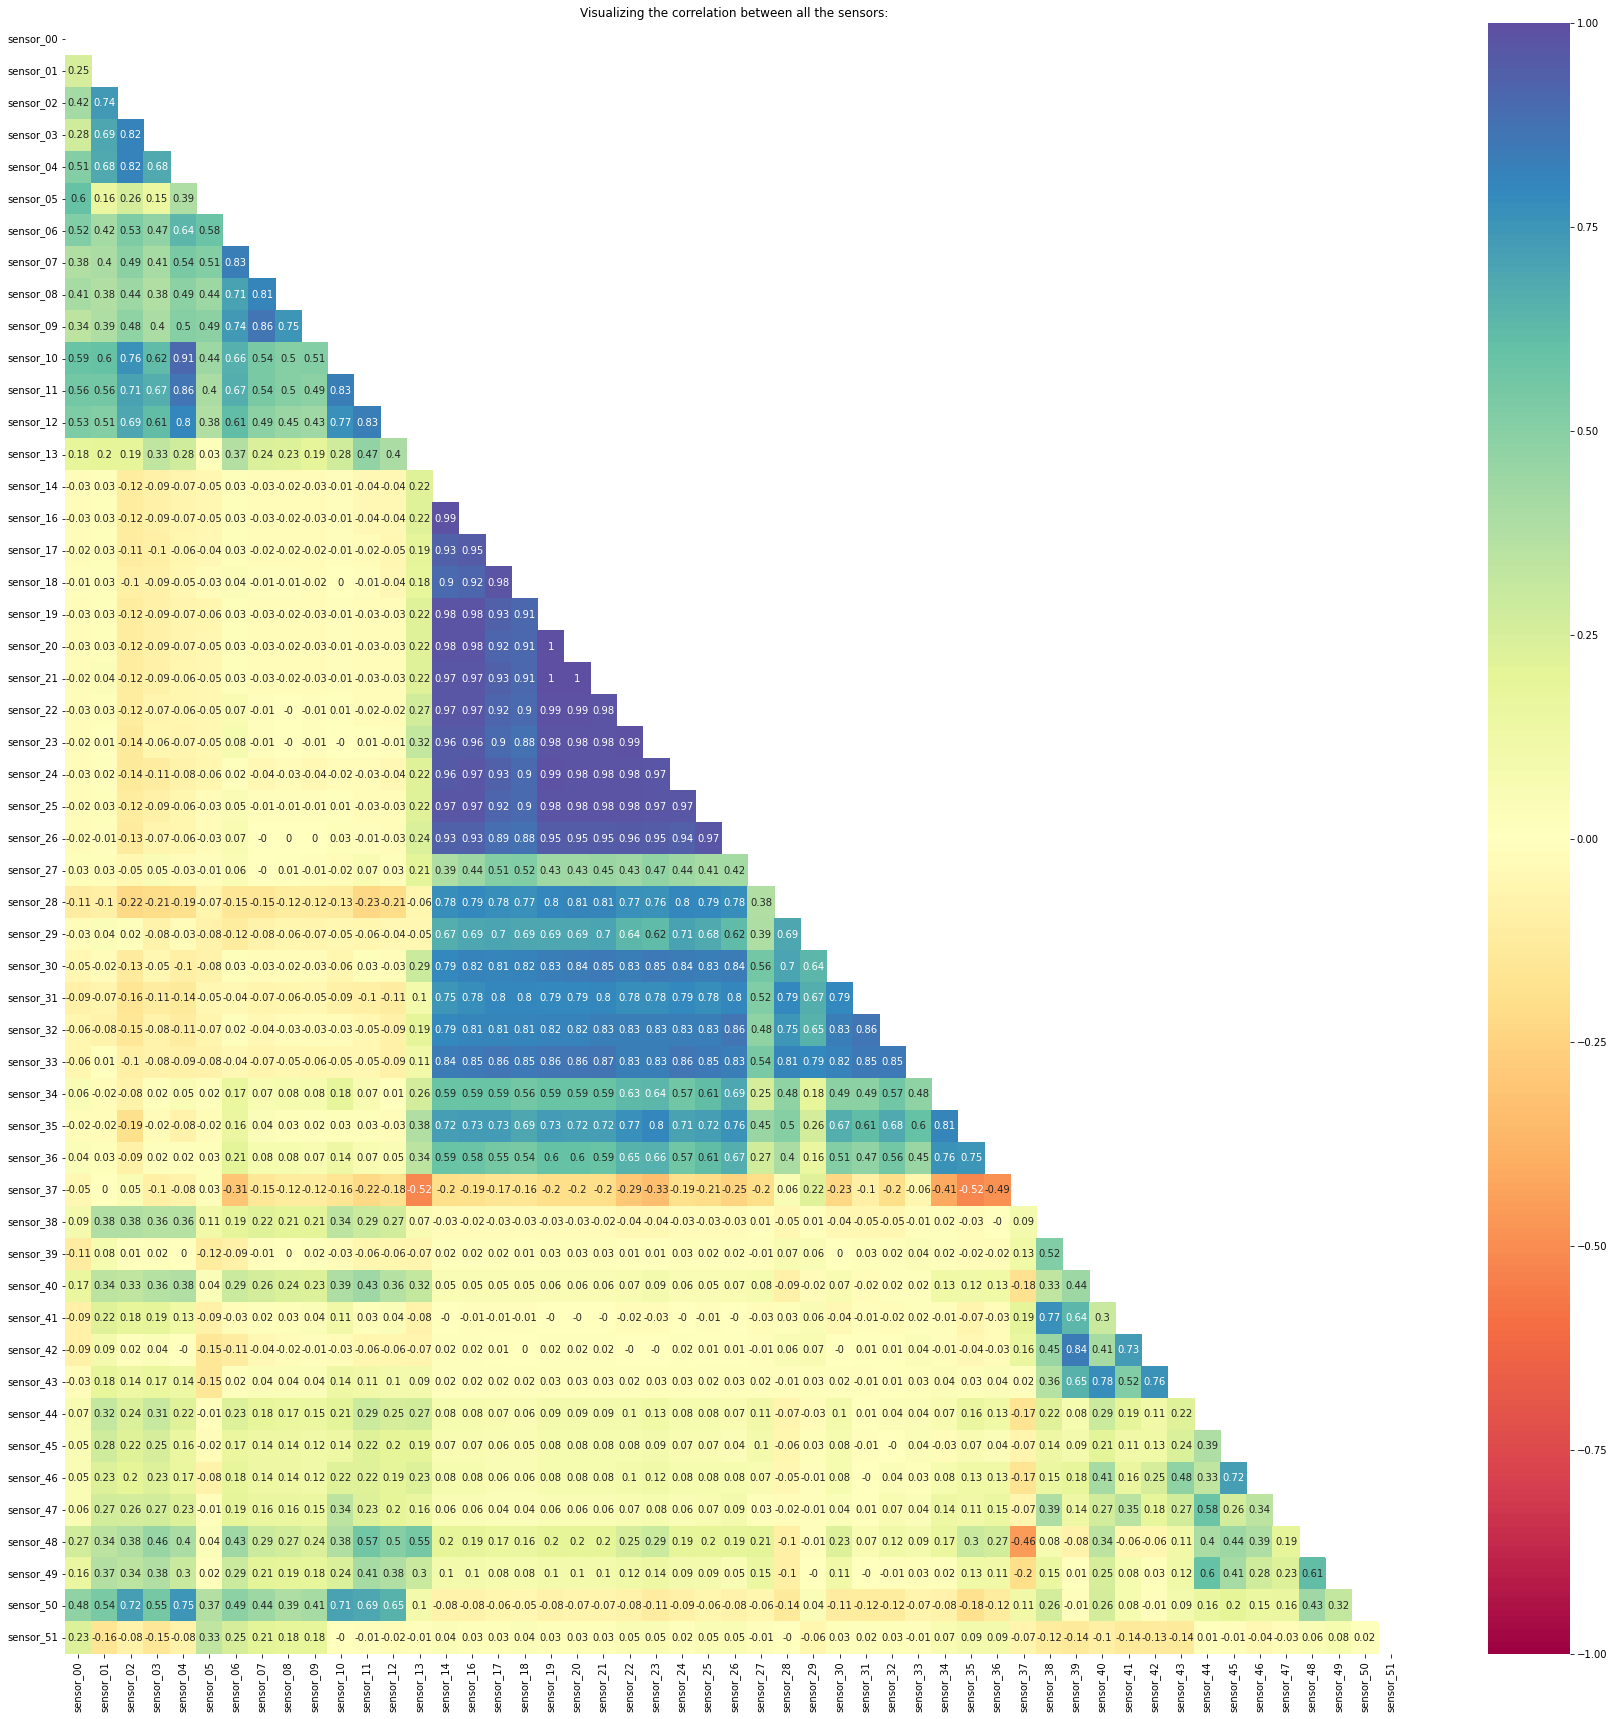

In [117]:
#Correlation between sensors
#We will be using only the lower triangle from the correlation matrix to avoid redundancy
df_corr_lt = df_tidy.corr().where(np.tril(np.ones(df_tidy.corr().shape),k=-1).astype(np.bool))
df_corr_lt=round(df_corr_lt,ndigits=2)
plt.figure(figsize=(30,30))
sns.heatmap(df_corr_lt,cmap="Spectral", vmin=-1.0, vmax=1.0,annot=True)
plt.title("Visualizing the correlation between all the sensors:")

The dataset contains sensor data for 52 sensors, the timestamp of when this data was captured, and the status of the machine.

"machine_status" is our Target variable.

Strong positive correlation implies that the sensors have readings which are similar, where as negative correlation implies that the readings are inversely propoertional.

Sensors 2-12 seem to have high positive correlation where as sensors 27 and 29 have high negative correlation with sensors 25 and 26 respectively.

We plan on further exploration of the potential impact of the correlation between sensors.


Therefore, a machine can three possible statuses: Normal, Recovering and Broken. As we aim to find anomalies in the machinery, our focus will be on the detection of the machines which have a predicted status of "Broken" and "Recovering".  

There are very few anomalies in the dataset compared to the number of normal and recovering machines.

Below we plot the readings of some of the sensors with respect to time and mark the 'Broken' readings with a red cross to visualize the anomaly

In [118]:
len(df_tidy[df_tidy['machine_status'].map(lambda x:x == 'BROKEN' or x== 'RECOVERING')])

14454

In [119]:
# Vizualize time series and the BROKEN state (red dots) in the same graph for each sensor
import warnings
# Extract the readings from BROKEN state and resample by daily average
broken = df_tidy[df_tidy['machine_status']=='BROKEN']
recovering = df_tidy[df_tidy['machine_status']=='RECOVERING']
# Extract the names of the numerical columns
df2 = df_tidy.drop(['machine_status'], axis=1)
names=df2.columns

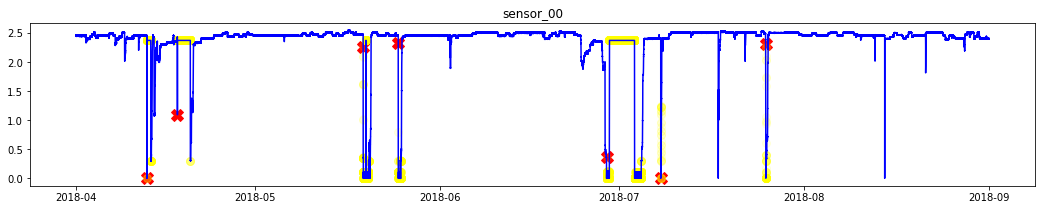

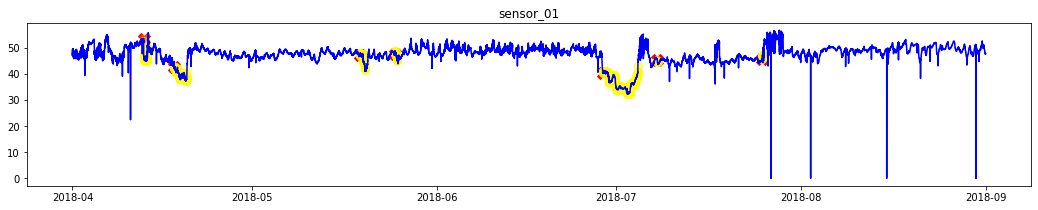

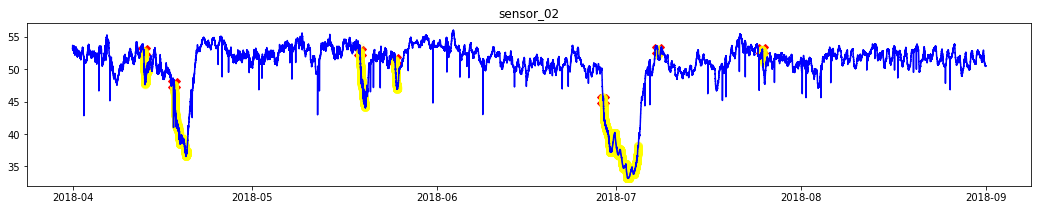

In [120]:
# Plot time series for each sensor with BROKEN state marked with X in red color
for i,name in enumerate(names):
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(recovering[name], linestyle='none', marker='o', color='Yellow', alpha=0.1,markersize=8)
    _ = plt.plot(df_tidy[name], color='blue')
    _ = plt.title(name)
    if i == 2:
        break
    plt.show()

**As seen clearly from the above plots, the red marks, which represent the broken state of the pump, perfectly overlaps with the observed disturbances of the sensor reading. Now we have a pretty good intuition about how each of the sensor reading behaves when the pump is broken vs operating normally.**

In [121]:
df_tidy.shape

(219521, 52)

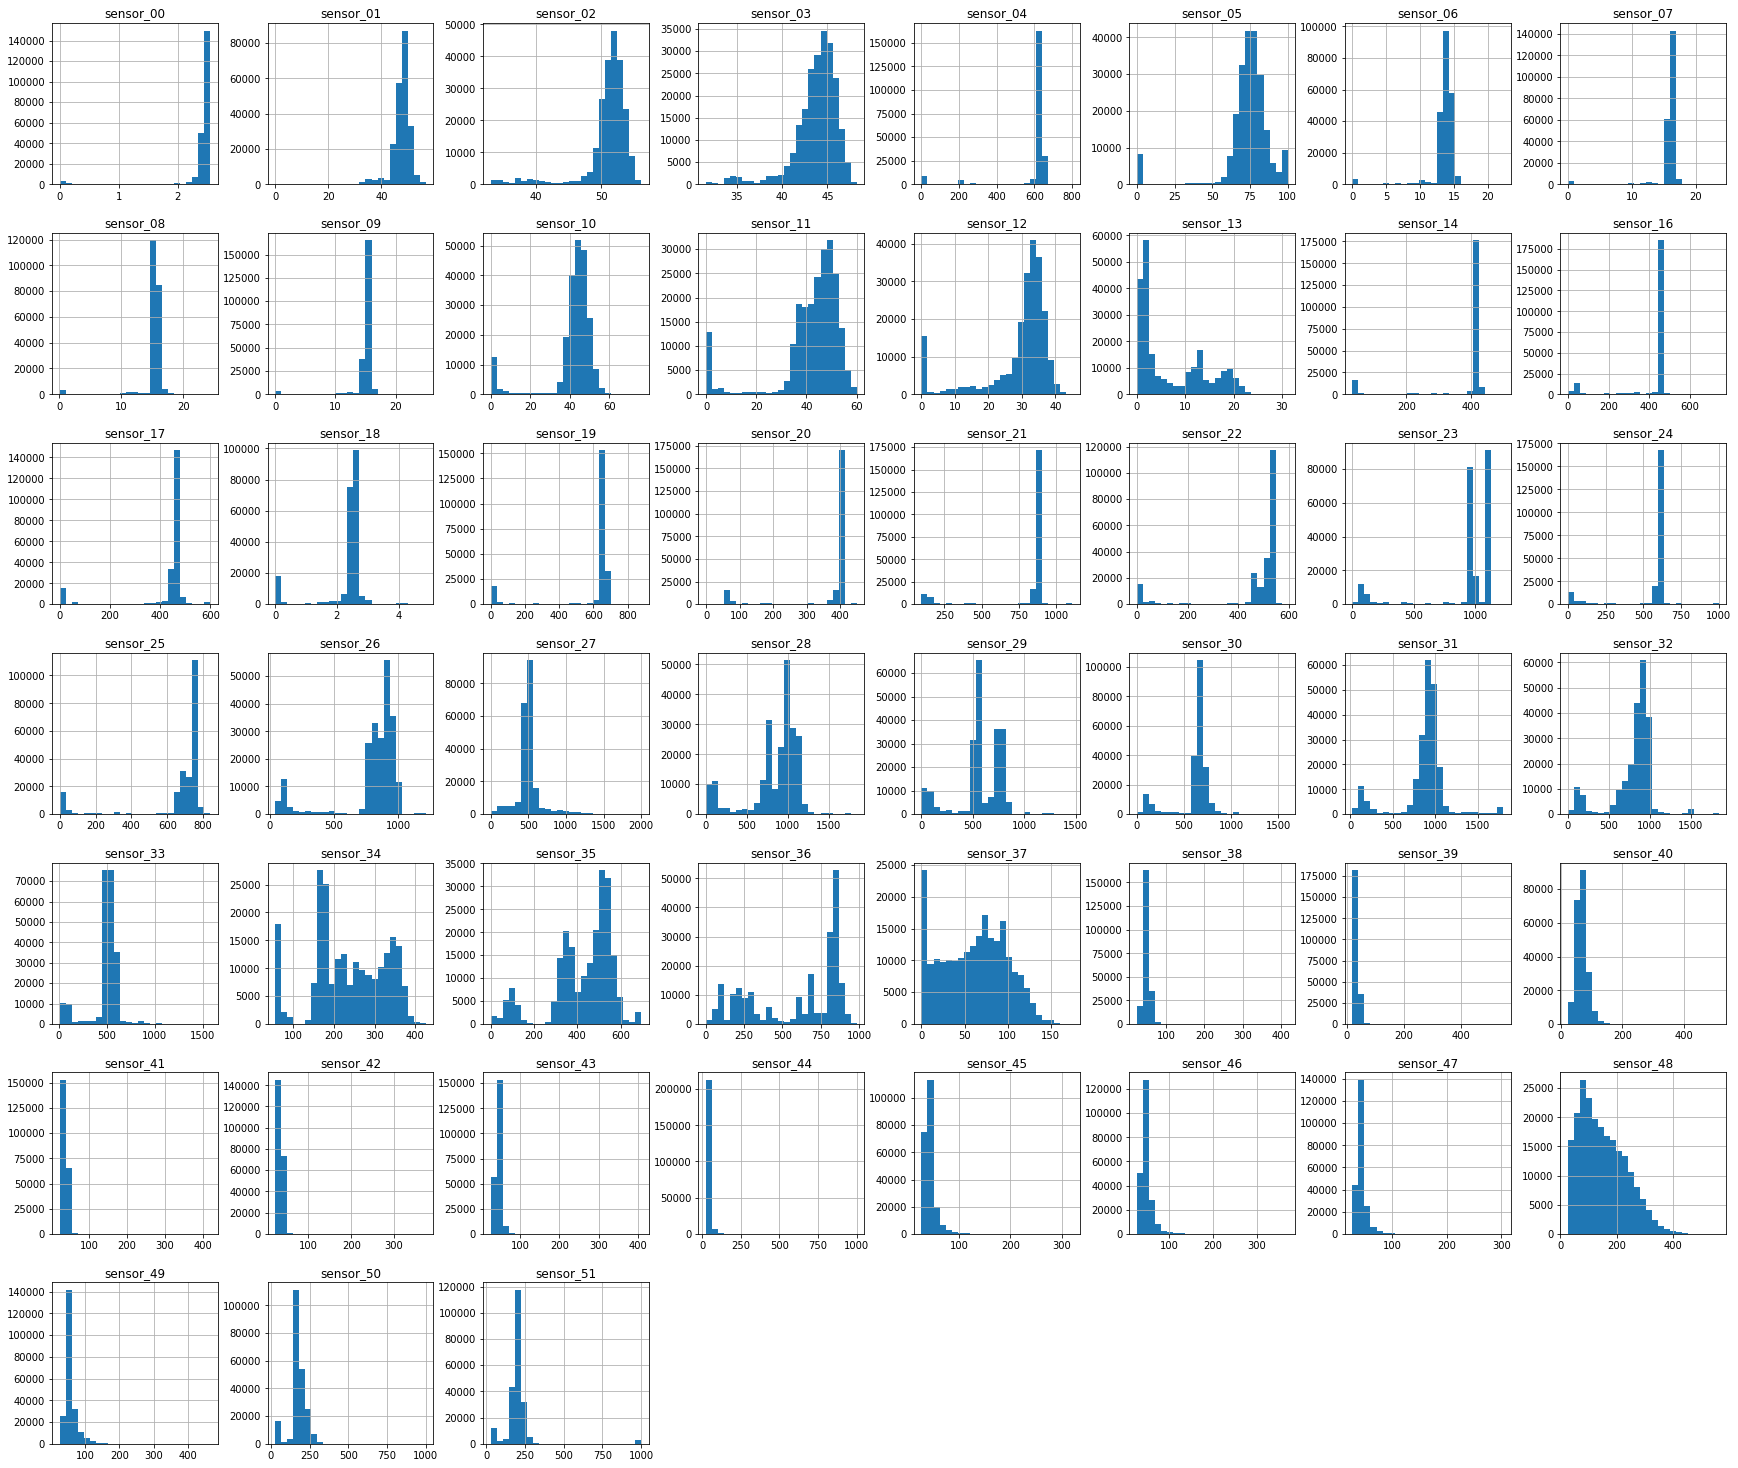

In [122]:
# Histogram
df_tidy.hist(df_tidy.columns, bins=25, layout=(8,8), figsize=(30, 30))
plt.show()

## Feature Engineering

**In this step, We will scale the data and apply Principal Component Analysis (PCA) to extract the most important features to be further used in training models. It is computationally quite expensive to process the data of this size, (219521, 52), hence the reason for reducing the dimensionality with PCA.**

In [123]:
# import pickle
# # f = open('df_tidy.pkl','wb')
# # pickle.dump(df_tidy,f)
# f = open('df_tidy.pkl','rb')
# df_tidy=pickle.load(f)

In [124]:
df2 = df_tidy.drop(['machine_status'], axis=1)
names=df2.columns

In [125]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [126]:
x = df_tidy[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

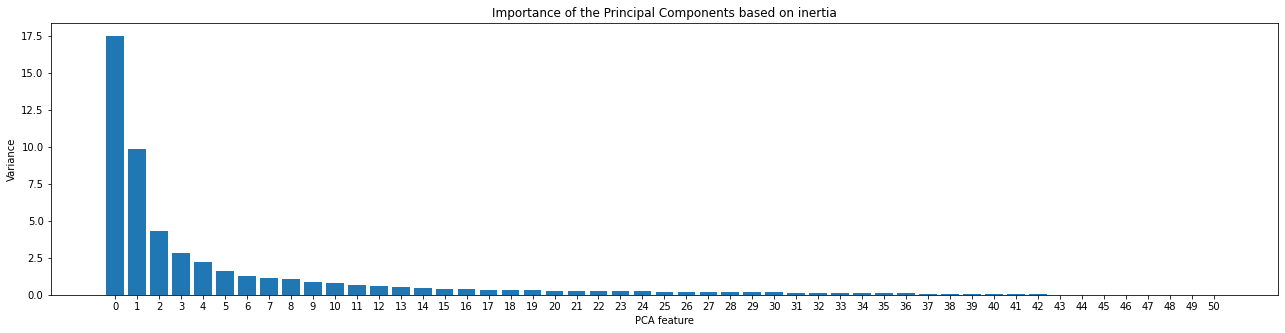

In [127]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [128]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [129]:
df_tidy['pc1']=pd.Series(principalDf['pc1'].values, index=df_tidy.index)
df_tidy['pc2']=pd.Series(principalDf['pc2'].values, index=df_tidy.index)

### Check stationarity with Dickey-Fuller Test

In [130]:
from statsmodels.tsa.stattools import adfuller

In [131]:
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

5.453684941848907e-05


In [132]:
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

1.8909142419376026e-06


### Check for Autocorrelation

In [133]:
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0020511948224250414


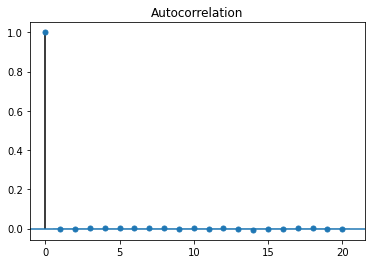

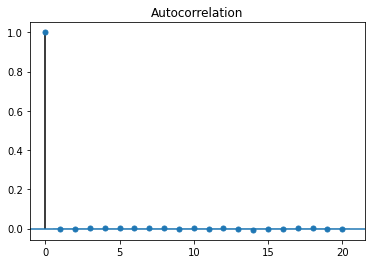

In [134]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [135]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -3.1508428842679586e-05


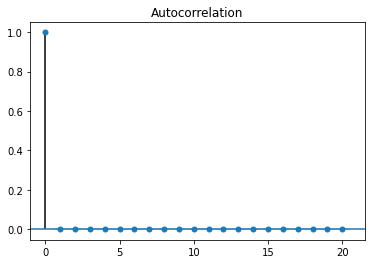

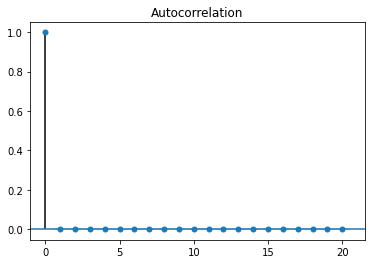

In [136]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

*_As seen from above, both features "pca1" and "pca2" are stationary variables with zero auto-correlation._*

## Statistical Modeling

### Model 1

**Base Model: Detect Outliers Using the Interquartile Range (IQR) <br>
Anomalies are defined as rare events that could be represented by the outliers in the data set. As an initial step, I want to apply a basic statistics technique to get the feel of the outliers present in this data set. Later, I will compare the results of the other models to the results from the Base Model for further model evaluation.**

0: normal

1: anomaly

In [137]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df_tidy['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df_tidy['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [138]:
lower_pc1, upper_pc1

(-736.3329510286195, 222.73590494563408)

In [139]:
lower_pc2, upper_pc2

(-738.2364730669017, 683.9742726686397)

In [140]:
df_tidy['anomaly_pc1'] = ((df_tidy['pc1']>upper_pc1) | (df_tidy['pc1']<lower_pc1)).astype('int')
df_tidy['anomaly_pc2'] = ((df_tidy['pc2']>upper_pc2) | (df_tidy['pc2']<lower_pc2)).astype('int')

In [141]:
df_tidy['anomaly_pc1'].value_counts()

0    189644
1     29877
Name: anomaly_pc1, dtype: int64

In [142]:
df_tidy['anomaly_pc2'].value_counts()

0    217947
1      1574
Name: anomaly_pc2, dtype: int64

In [143]:
outliers_pc1 = df_tidy.loc[(df_tidy['pc1']>upper_pc1) | (df_tidy['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df_tidy.loc[(df_tidy['pc2']>upper_pc2) | (df_tidy['pc2']<lower_pc2), 'pc2']

In [144]:
len(outliers_pc1)/len(df_tidy)

0.13610087417604694

In [145]:
len(outliers_pc2)/len(df_tidy)

0.0071701568414866915

In [146]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df_tidy.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df_tidy['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


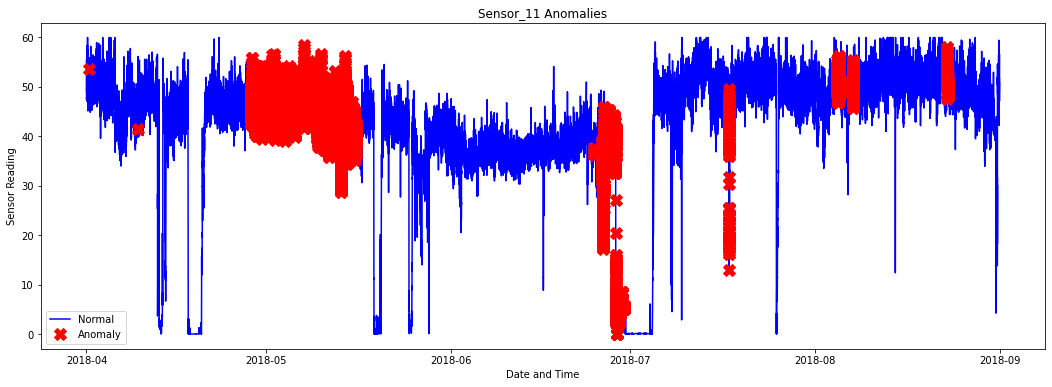

In [147]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df_tidy[df_tidy['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tidy['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

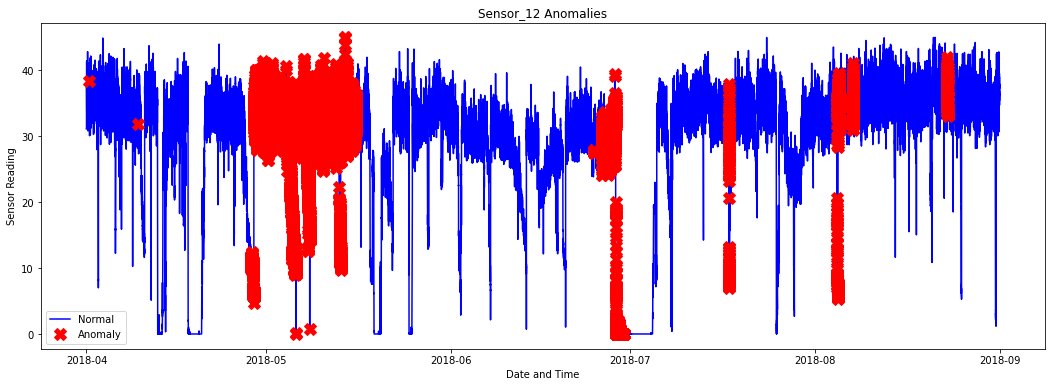

In [148]:
# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df_tidy[df_tidy['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tidy['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

*_As seen from above, there are a lot more outliers in pc1 (1st principal component) than that from pc2. The outliers in pc1 represent approximately 14% of the data set. Also the outliers in pc1 seem to better explain the failures in the sensor readings from one of the sensors, sensor_00 is used in this case._*

### Model 2 : K-means clustering

The underline assumption in the clustering based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters. We use the following steps to find and visualize anomalies.

* Calculate the distance between each point and its nearest centroid. The biggest distances are considered as anomaly.
* We use outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. * Situations may vary from data set to data set. However, as a starting figure, I estimate outliers_fraction=0.14 (14% of df are outliers as depicted above).
* Calculate number_of_outliers using outliers_fraction.
* Set threshold as the minimum distance of these outliers.
* The anomaly result of anomaly1 contains the above method Cluster (0:normal, 1:anomaly).
* Visualize anomalies with cluster view.
* Visualize anomalies with Time Series view.

In [149]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

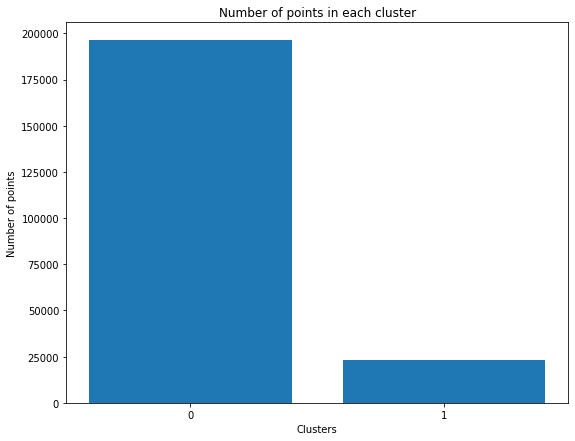

In [150]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

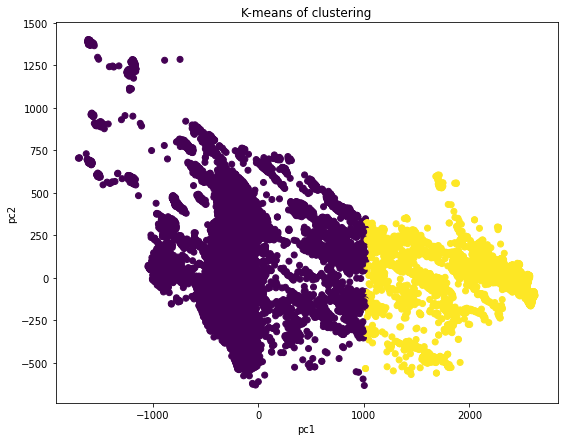

In [151]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

#### Function that calculates distance between each point and the centroid of the closest cluster

In [152]:
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [153]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

**Accuracy Calculation Function between actual and predicted anomaly**

In [154]:
def accuracy_calc(predicted_label, true_label):
    return np.sum(predicted_label == true_label)/len(true_label)

In [155]:
principalDf['anomaly1'].value_counts()

0    190984
1     28537
Name: anomaly1, dtype: int64

In [156]:
df_tidy['anomaly']= np.where(df_tidy['machine_status'] == 'NORMAL', False, True)
df_tidy['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df_tidy.index)

In [157]:
print("The Accuracy on entire Data using K means Clustering is: ", \
      accuracy_calc(df_tidy['anomaly'],df_tidy['anomaly1']))

The Accuracy on entire Data using K means Clustering is:  0.8204864227112668


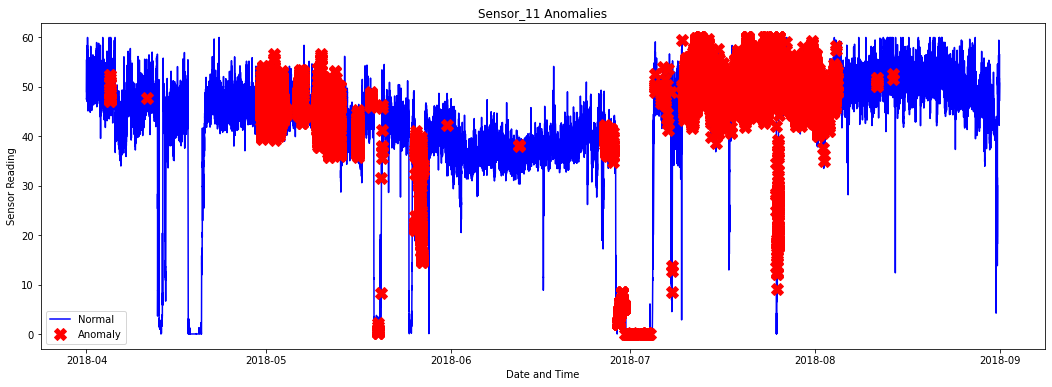

In [158]:
a = df_tidy[df_tidy['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tidy['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

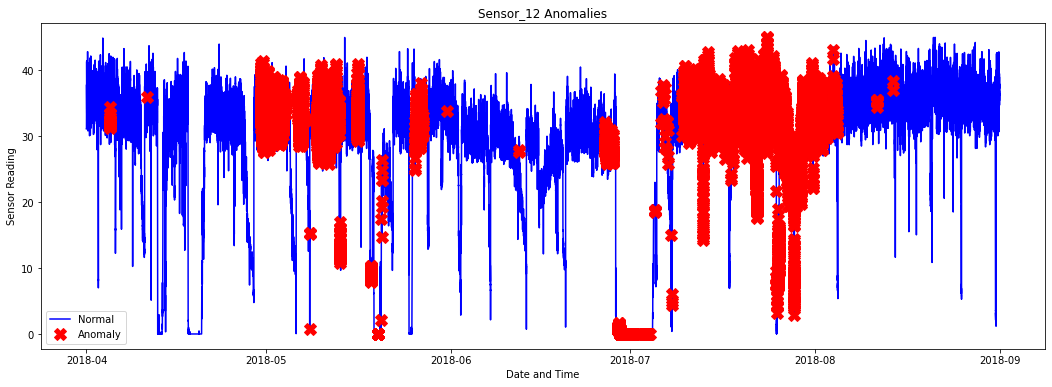

In [159]:
a = df_tidy[df_tidy['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tidy['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [160]:
df_tidy[df_tidy['anomaly1']==1]['machine_status'].value_counts()

NORMAL        26745
RECOVERING     1791
BROKEN            1
Name: machine_status, dtype: int64

In [161]:
df_tidy['anomaly1'].value_counts()

0    190984
1     28537
Name: anomaly1, dtype: int64

### Model 3 : Multivariate Gaussian Distribution

In [162]:
pca2 = PCA(0.9)
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

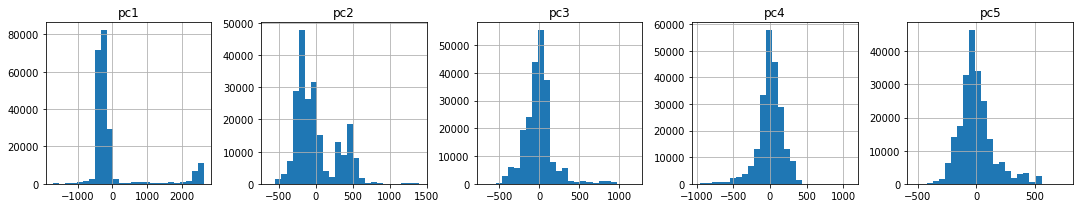

In [163]:
principalDf2.hist(principalDf2.columns, bins=25, layout=(8,8), figsize=(30, 30))
plt.show()

In [164]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score,confusion_matrix

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [165]:
def select_threshold(probs, test_data):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs), max(probs), stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(test_data, predictions, average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon

    return best_f1, best_epsilon

In [166]:
principalDf2['machine_status'] = pd.Series(df_tidy['machine_status'].values, index=principalDf2.index)

In [167]:
principalDf2['anomaly']= np.where(principalDf2['machine_status'] == 'NORMAL', False, True)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf2.iloc[:,0:5],principalDf2['anomaly'],test_size=0.20, random_state=42)

In [169]:
len(y_test)

43905

In [170]:
mu, sigma = estimate_gaussian(X_train)
p_tr = multivariate_gaussian(X_train,mu,sigma)
p_ts = multivariate_gaussian(X_test,mu,sigma)

In [171]:
fscore, ep = select_threshold(p_ts,y_test)
print(fscore, ep)

0.6024551463644947 1.7111345161379223e-17


In [172]:
p_all = multivariate_gaussian(principalDf2.iloc[:,0:5],mu,sigma)

In [173]:
principalDf2['anomaly2'] = (p_all < ep).astype(int)

principalDf2['anomaly2'].value_counts()

0    202033
1     17488
Name: anomaly2, dtype: int64

In [174]:
print("The Accuracy on entire Data using Multivariate Gaussian Distribution is: ", \
      accuracy_calc(principalDf2['anomaly'],principalDf2['anomaly2']))

The Accuracy on entire Data using Multivariate Gaussian Distribution is:  0.9419098856145881


### Model 4: Gaussian mixture **models**

In [190]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0,init_params='kmeans', n_init=7).fit(X_train,y_train)
y_pred_gm_test = gm.predict(X_test)

In [191]:
print("The Accuracy on test Data using Gaussian Mixture Models is: ",accuracy_calc(y_test,y_pred_gm_test))

The Accuracy on test Data using Gaussian Mixture Models is:  0.8029153854914018


In [203]:
print("The F_Score on test Data using Gaussian Mixture Models is: ",f1_score(y_test,y_pred_gm_test))

The F_Score on test Data using Gaussian Mixture Models is:  0.07006985491671144


In [192]:
print("The Confusion Matrix on test Data using Gaussian Mixture Models is: \n", \
    confusion_matrix(y_test,y_pred_gm_test))

The Confusion Matrix on test Data using Gaussian Mixture Models is: 
 [[34926  6085]
 [ 2568   326]]


In [193]:
y_pred_gm_all = gm.predict(principalDf2.iloc[:,0:5])

In [194]:
print("The Accuracy on the entire Data using Gaussian Mixture Models is: ",accuracy_calc(principalDf2['anomaly'],y_pred_gm_all))

The Accuracy on the entire Data using Gaussian Mixture Models is:  0.8000692416670843


In [204]:
print("The F_Score on entire Data using Gaussian Mixture Models is: ",f1_score(principalDf2['anomaly'],y_pred_gm_all))

The F_Score on entire Data using Gaussian Mixture Models is:  0.06953719603977189


In [195]:
print("The Confusion Matrix on the entire Data using Gaussian Mixture Models is: \n", \
    confusion_matrix(principalDf2['anomaly'],y_pred_gm_all))

The Confusion Matrix on the entire Data using Gaussian Mixture Models is: 
 [[173992  31075]
 [ 12814   1640]]


Gaussian Mixture Models can also used to find the probablistic cluster assignments.

In [196]:
probs_test = gm.predict_proba(principalDf2.iloc[:,0:5])

We will be using the predicted probabilities from the Gaussian Mixture Models to detect anomalies using the same threshold method as the Multivariate Gaussian Distribution model.

In [197]:
fscore_gm, ep_gm = select_threshold(probs_test[:,[0]],principalDf2['anomaly'])
print(fscore_gm, ep_gm)

0.07652499898129661 0.9989999999997515


In [198]:
principalDf2['gm_anomaly'] = (p_all < ep).astype(int)

In [199]:
principalDf2['gm_anomaly'].value_counts()

0    202033
1     17488
Name: gm_anomaly, dtype: int64

In [205]:
confusion_matrix(principalDf2['gm_anomaly'],principalDf2['anomaly'])

array([[197174,   4859],
       [  7893,   9595]])

In [201]:
print("The Accuracy on entire Data using Gaussian Mixture Models is: ",accuracy_calc(principalDf2['gm_anomaly'],principalDf2['anomaly']))

The Accuracy on entire Data using Gaussian Mixture Models is:  0.9419098856145881
